<a href="https://colab.research.google.com/github/hecescam/IA3/blob/main/Hunger_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

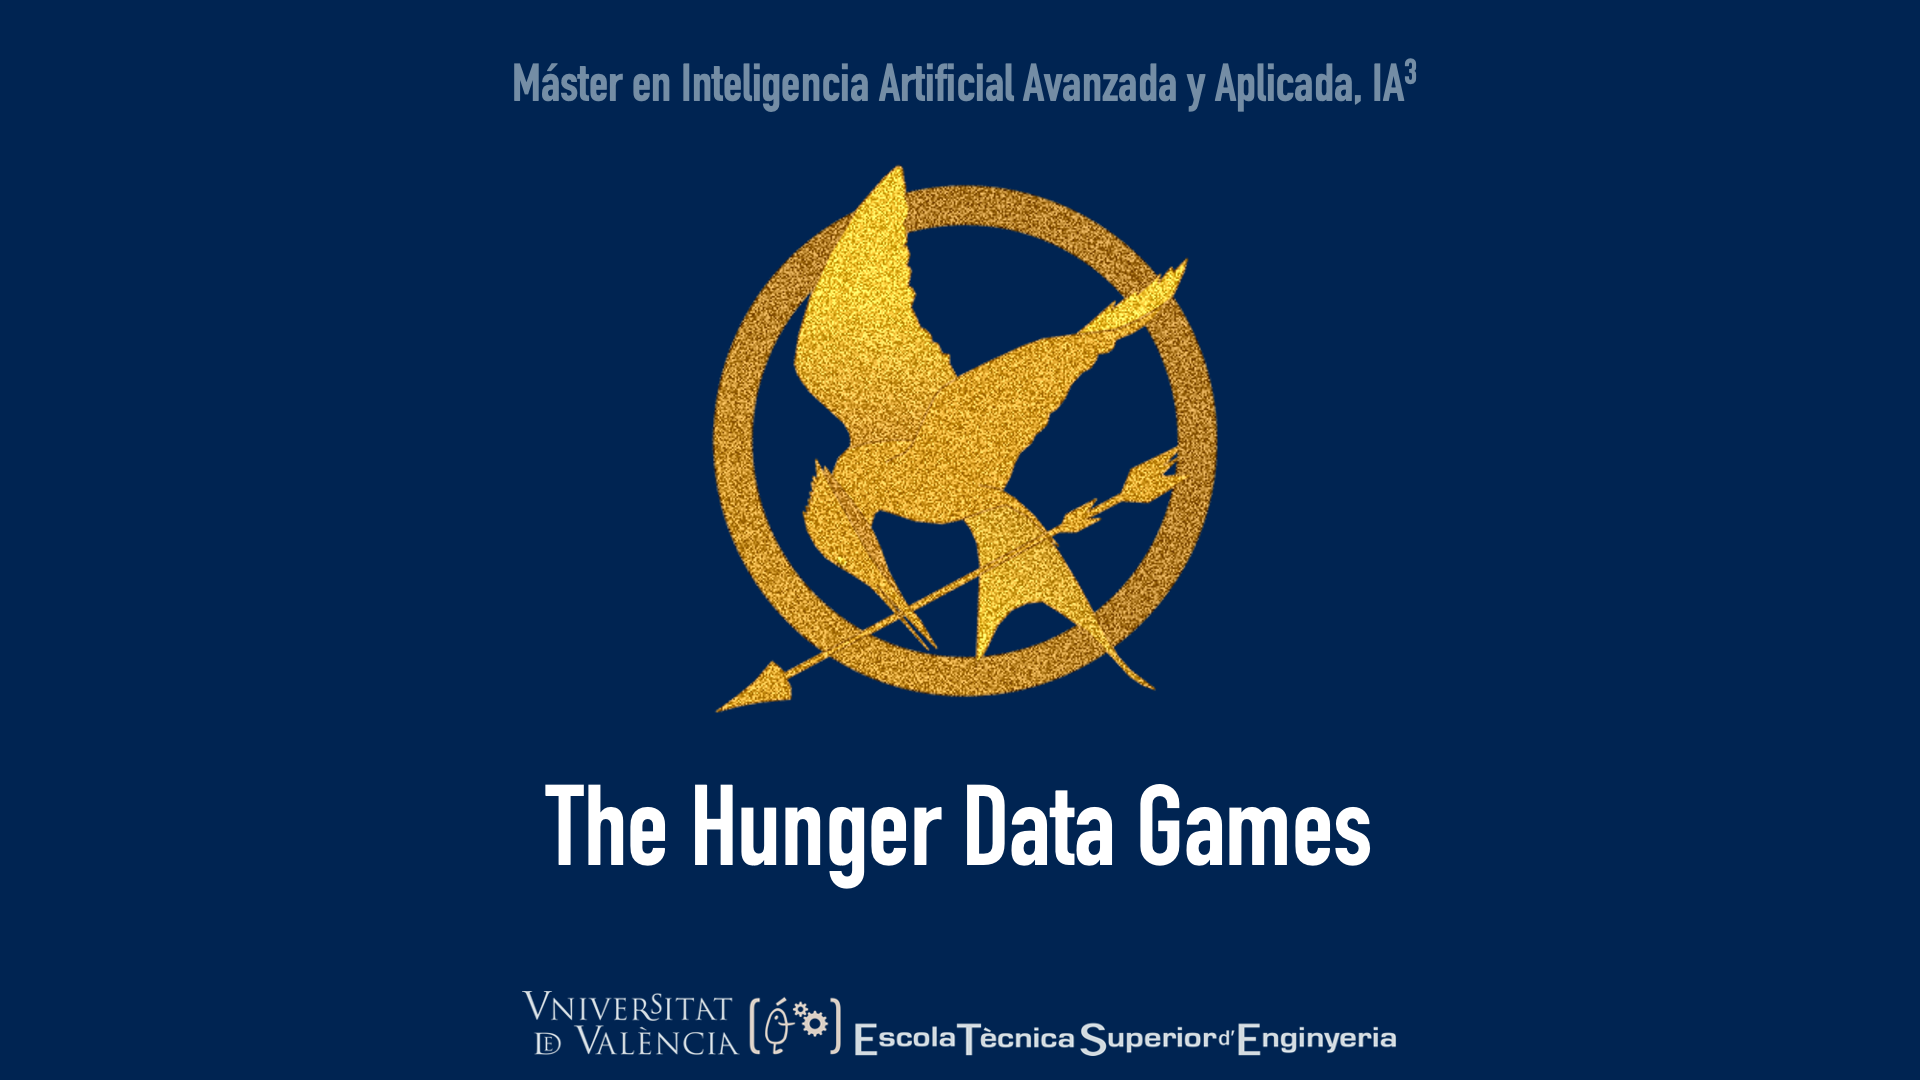

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



## Import Libraries and Loading the Dataset

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,recall_score,precision_score,balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/hunger_data.csv"
#url ='https://github.com/hecescam/IA3/blob/main/glass.csv'
dataframe = pd.read_csv(url,header=0)
dataframe.drop("Unnamed: 0", axis=1, inplace=True)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [11]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2
3,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
4,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1
5,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
6,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6
7,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
8,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
9,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

## Dataframe size

In [12]:
dataframe.shape

(117, 10)

In [63]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive_index  117 non-null    float64
 1   sodium            117 non-null    float64
 2   magnesium         117 non-null    float64
 3   aluminum          117 non-null    float64
 4   silicon           117 non-null    float64
 5   potassium         117 non-null    float64
 6   calcium           117 non-null    float64
 7   barium            117 non-null    float64
 8   iron              117 non-null    float64
 9   type_of_glass     117 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 9.3 KB


In [65]:
dataframe['type_of_glass'] = dataframe['type_of_glass'].astype('str')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive_index  117 non-null    float64
 1   sodium            117 non-null    float64
 2   magnesium         117 non-null    float64
 3   aluminum          117 non-null    float64
 4   silicon           117 non-null    float64
 5   potassium         117 non-null    float64
 6   calcium           117 non-null    float64
 7   barium            117 non-null    float64
 8   iron              117 non-null    float64
 9   type_of_glass     117 non-null    object 
dtypes: float64(9), object(1)
memory usage: 9.3+ KB


## Descriptive statistics

In [66]:
dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1.518621,13.387436,2.509145,1.411624,72.673590,0.537607,9.128889,0.168034,0.061880
std,0.003525,0.918562,1.535116,0.528611,0.881914,0.837398,1.607853,0.508017,0.106528
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516550,12.860000,0.780000,1.160000,72.340000,0.120000,8.240000,0.000000,0.000000
50%,1.517760,13.240000,3.470000,1.320000,72.860000,0.550000,8.710000,0.000000,0.000000
75%,1.519770,13.830000,3.580000,1.620000,73.100000,0.610000,9.490000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.040000,75.410000,6.210000,16.190000,3.150000,0.510000


## We check for null data

In [67]:
dataframe.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

## We separate the features and the target in different dataframes
### - Dataframe features ("matrix X")

In [68]:
X=dataframe.drop(columns='type_of_glass')
X

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00
3,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34
4,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00
...,...,...,...,...,...,...,...,...,...
112,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00
113,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0.00,0.00
114,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00
115,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.00,0.00


### - Dataframe target variable ('Y')

In [69]:
Y=dataframe.loc[:,['type_of_glass']]
Y

,type_of_glass
0,1
1,1
2,2
3,2
4,1
...,...
112,1
113,5
114,2
115,2


## Correlation of features

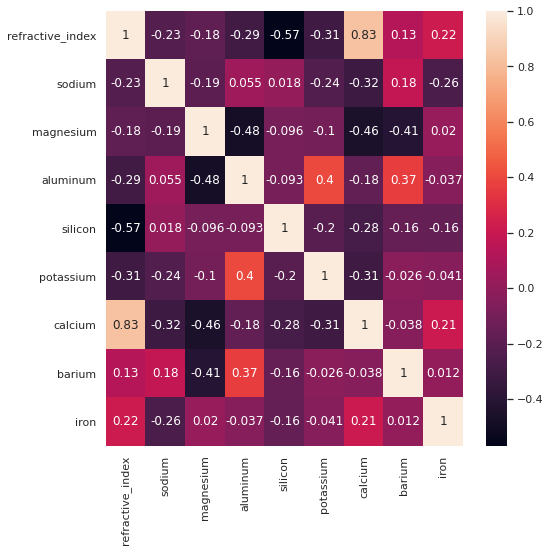

In [70]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Calcium and refractive_index have a high linear correlation 

## Target variable distribution (Class Balance Analysis)


In [71]:
Y['type_of_glass'].unique()

array(['1', '2', '7', '6', '3', '5'], dtype=object)

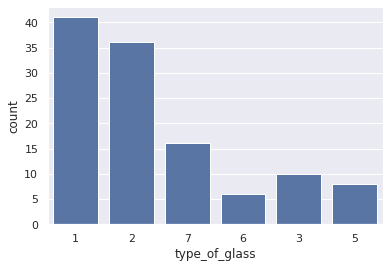

1    41
2    36
7    16
3    10
5     8
6     6
Name: type_of_glass, dtype: int64


In [240]:
sns.set_theme(style="darkgrid")
sns.countplot(x=Y['type_of_glass'],color='b')
plt.show()
print(pd.value_counts(Y['type_of_glass'], sort = True))

### -There are unbalanced classes and there is no class 4

## Visualize data distribution

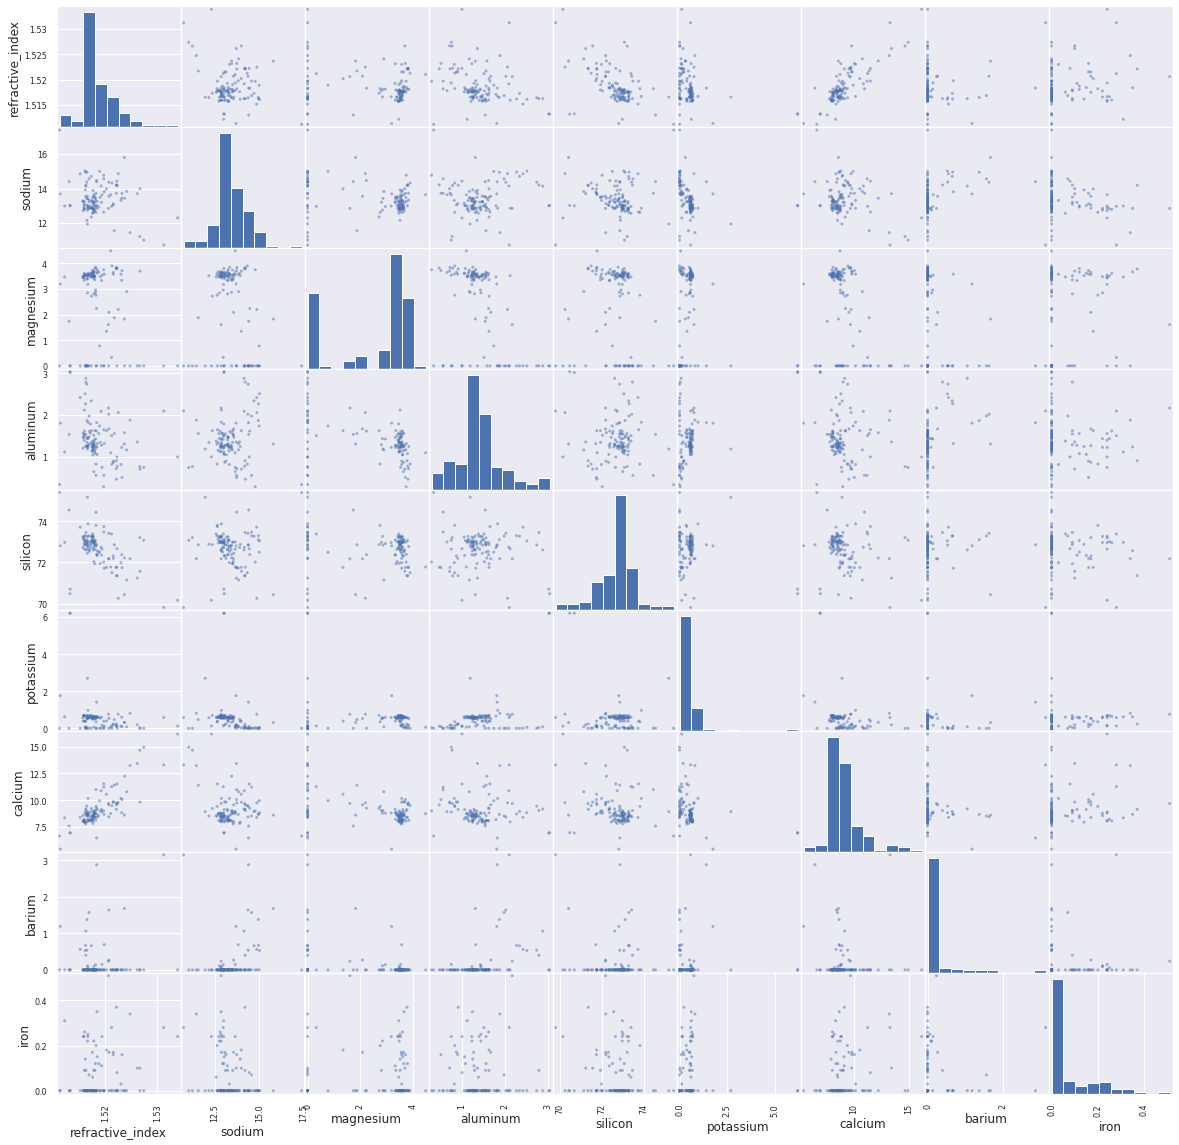

In [73]:
pd.plotting.scatter_matrix(X, figsize=(20.0,20.0)); 

In [75]:
fig = px.scatter_matrix(data_frame=dataframe, dimensions=X.columns, color="type_of_glass")
fig.show()
#fig = px.scatter_matrix()

### - Visualize features with high linear correlation ('calcium', 'refractive_index')

In [76]:
fig = px.scatter(dataframe, x="calcium", y="refractive_index" , color="type_of_glass")
fig.show()



## Outlier Analysis

In [77]:
fig = make_subplots(rows=5, cols=2,column_widths=[5,5],row_heights=[100,100,100,100,100],specs=[[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},{'rowspan': 1, 'colspan': 1}],[{'rowspan': 1, 'colspan': 1},None]],vertical_spacing=0.075,horizontal_spacing=0.08)

n=0
for i in range(1,6):
  for j in range(1,3):
    fig.append_trace(go.Box(x = np.array(Y['type_of_glass']), y = np.array(X[X.columns[n]]),boxpoints='all',name=X.columns[n]), row = i, col = j)
    n+=1
    if n==len(X.columns):
      break

fig.update_layout(title_text="OUTLIER ANALYSIS")
fig.show()

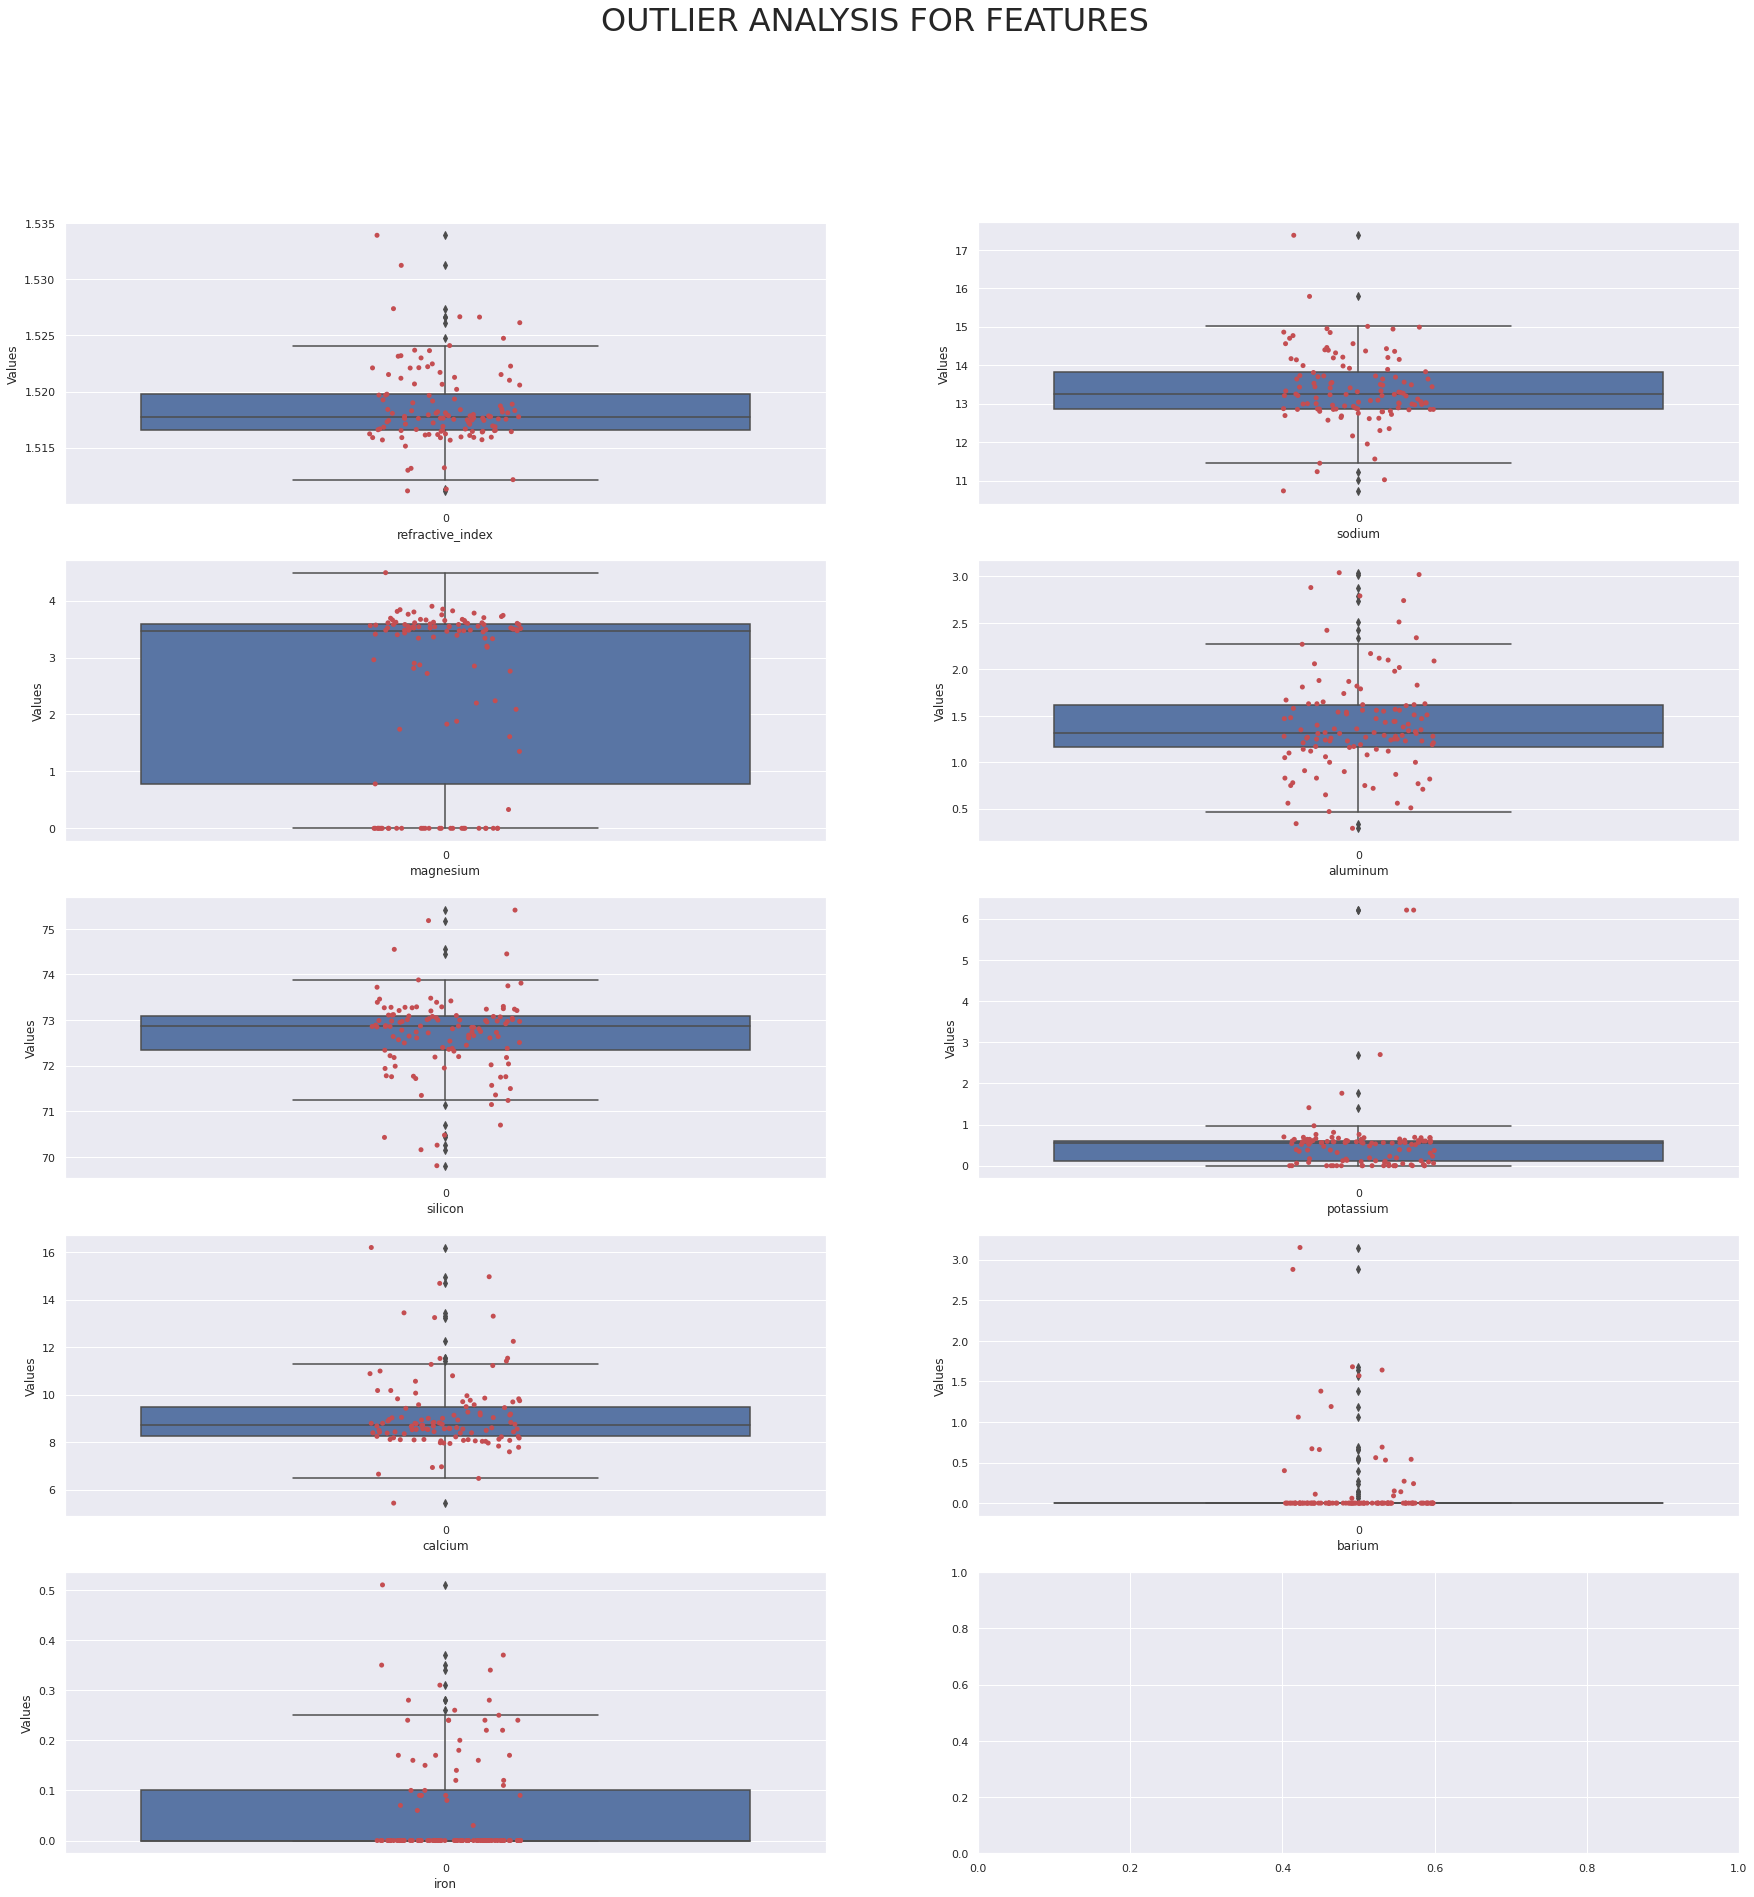

In [78]:
f, axes = plt.subplots(5, 2,figsize=(30, 30))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(data=X[X.columns[n]] ,ax=axes[i,j])
    #sns.swarmplot(data=X[X.columns[n]],color='r', ax=axes[i,j])
    sns.stripplot(data=X[X.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X.columns[n], ylabel='Values')
    n+=1
    if n==len(X.columns):
      break
f.suptitle('OUTLIER ANALYSIS FOR FEATURES', fontsize=32)
plt.show()

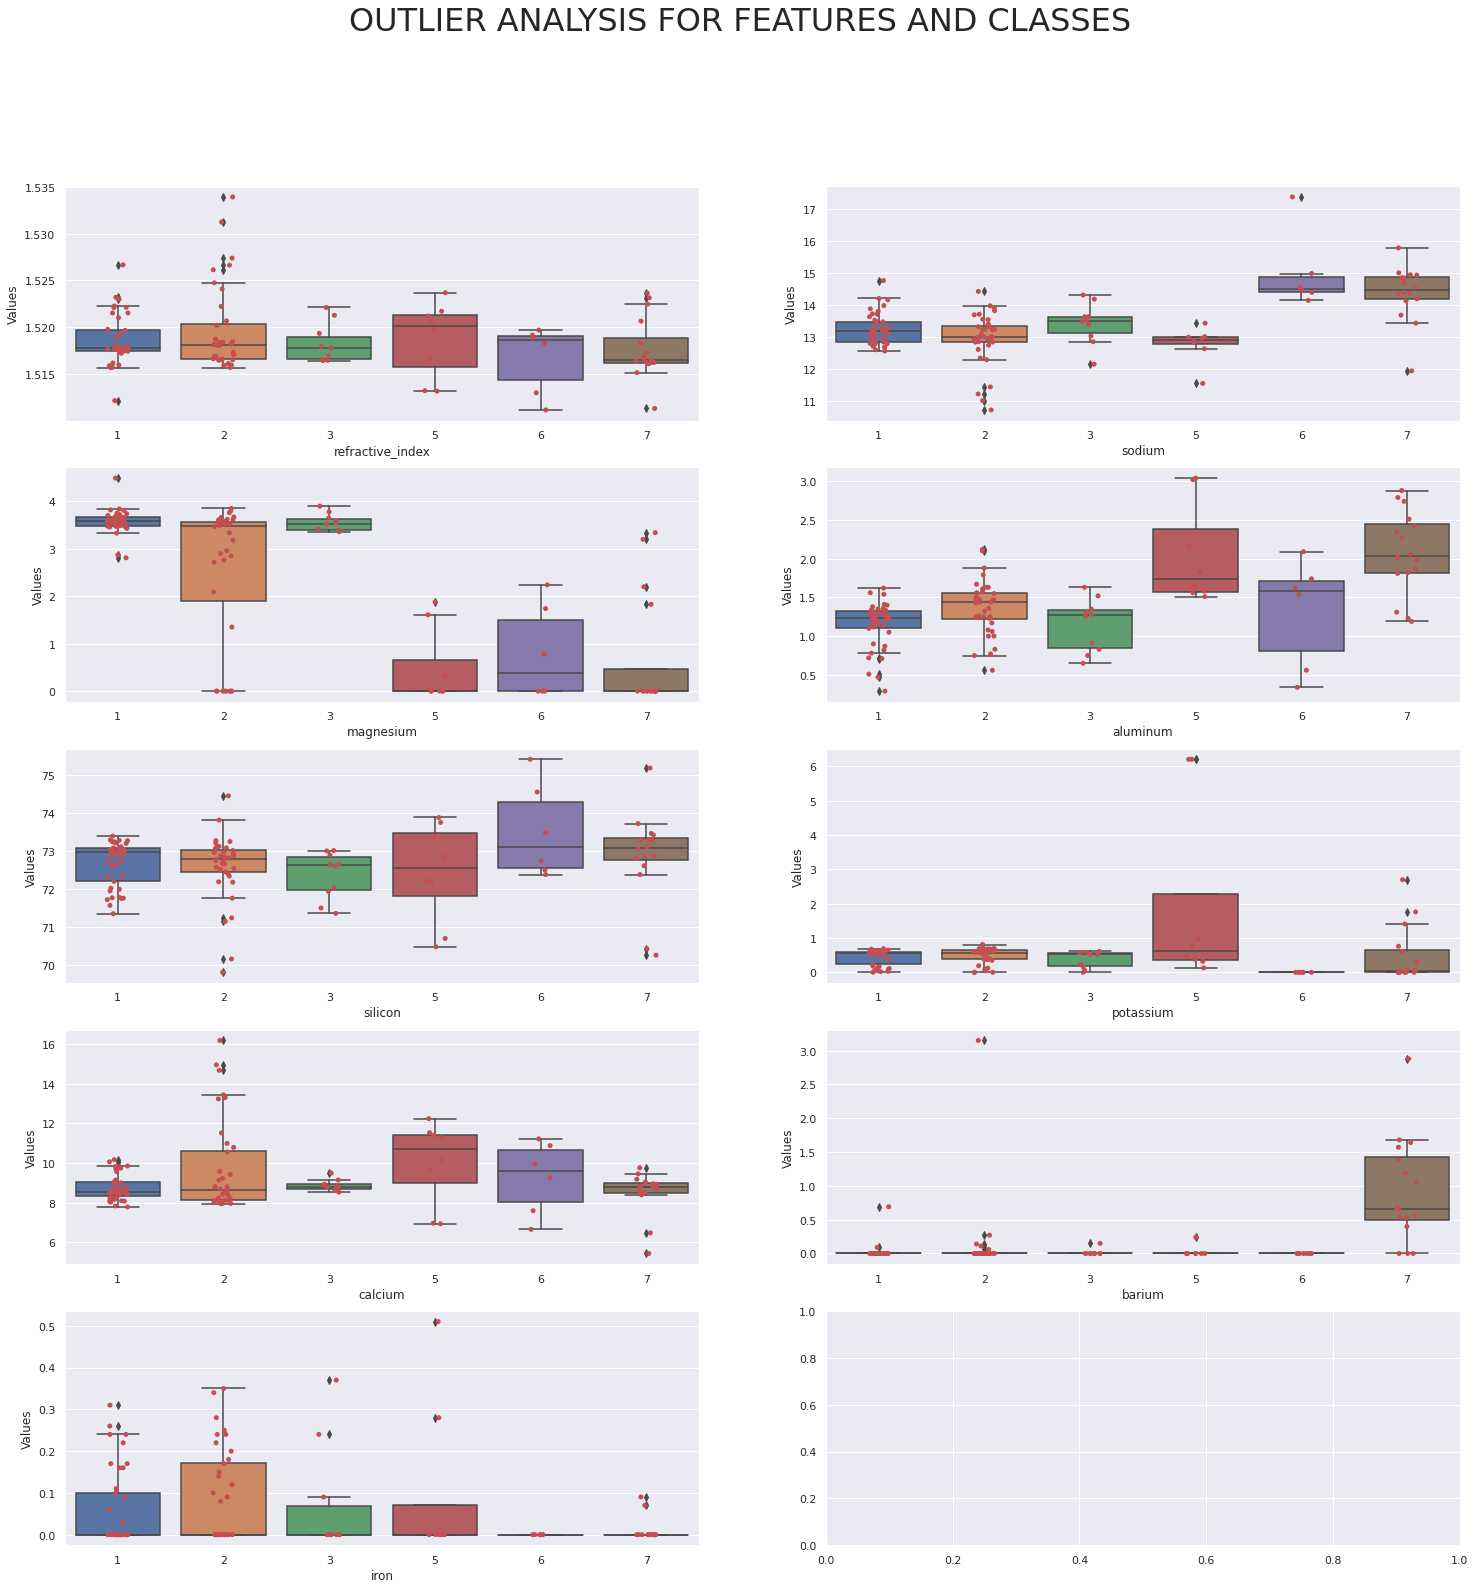

In [40]:

f, axes = plt.subplots(5, 2,figsize=(25, 25))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(x=Y['type_of_glass'],y=X[X.columns[n]],ax=axes[i,j])
    #sns.swarmplot(x=Y['type_of_glass'],y=X[X.columns[n]],color='r', ax=axes[i,j])
    sns.stripplot(x=Y['type_of_glass'],y=X[X.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X.columns[n], ylabel='Values')
    n+=1
    if n==len(X.columns):
      break
f.suptitle('OUTLIER ANALYSIS FOR FEATURES AND CLASSES', fontsize=32)
plt.show()

In [127]:
dataframe_clean=pd.DataFrame()
#df_clean_concat=pd.DataFrame()
for feature in X.columns:
  df_clean_concat=pd.DataFrame()
  for clas in Y.type_of_glass.unique():
    #aux=dataframe.feature[dataframe.type_of_glass==clas]
    #print(feature,' : ',clas)
    df_aux=pd.DataFrame(dataframe[feature][dataframe.type_of_glass==clas])
    #find Q1, Q3, and interquartile range for each column
    Q1 = df_aux.quantile(q=.25)
    Q3 = df_aux.quantile(q=.75)
    IQR = Q3-Q1#df_aux.apply(stats.iqr)

    
    df_clean = df_aux[~((df_aux < (Q1-1.5*IQR)) | (df_aux > (Q3+1.5*IQR))).any(axis=1)]
    df_clean_concat=pd.concat([df_clean_concat,df_clean], axis=0)
    
  dataframe_clean=pd.concat([dataframe_clean,df_clean_concat], axis=1)

dataframe_clean=pd.concat([dataframe_clean,Y], axis=1)



In [128]:
dataframe_clean

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.0,0.24,1
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.0,0.00,2
3,1.52475,NaN,0.00,1.88,72.19,0.81,13.24,0.0,0.34,2
4,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,NaN,0.00,1
...,...,...,...,...,...,...,...,...,...,...
112,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.0,0.00,1
113,1.52171,NaN,NaN,1.56,72.86,0.47,11.41,0.0,0.00,5
114,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,NaN,0.00,2
115,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.0,0.00,2


In [129]:
dataframe_clean.isna().sum()

refractive_index    12
sodium              11
magnesium            8
aluminum             8
silicon              8
potassium            4
calcium              9
barium              10
iron                 8
type_of_glass        0
dtype: int64

In [130]:
dataframe_clean.dropna(inplace=True)
dataframe_clean.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [132]:
print(dataframe_clean.shape)
dataframe_clean

(71, 10)


,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2
5,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
6,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00,6
...,...,...,...,...,...,...,...,...,...,...
108,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
110,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09,2
111,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.00,0.00,3
112,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00,1


In [133]:
X_clean=dataframe_clean.drop(columns='type_of_glass')
X_clean

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24
1,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
2,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00
5,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
6,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.00,0.00
...,...,...,...,...,...,...,...,...,...
108,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
110,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09
111,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.00,0.00
112,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.00,0.00


In [134]:
Y_clean=dataframe_clean.loc[:,['type_of_glass']]
Y_clean

,type_of_glass
0,1
1,1
2,2
5,7
6,6
...,...
108,2
110,2
111,3
112,1


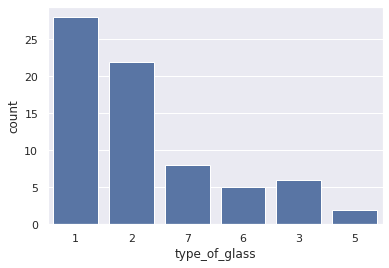

1    28
2    22
7     8
3     6
6     5
5     2
Name: type_of_glass, dtype: int64


In [239]:
sns.set_theme(style="darkgrid")
sns.countplot(x=Y_clean['type_of_glass'],color='b')
plt.show()
print(pd.value_counts(Y_clean['type_of_glass'], sort = True))

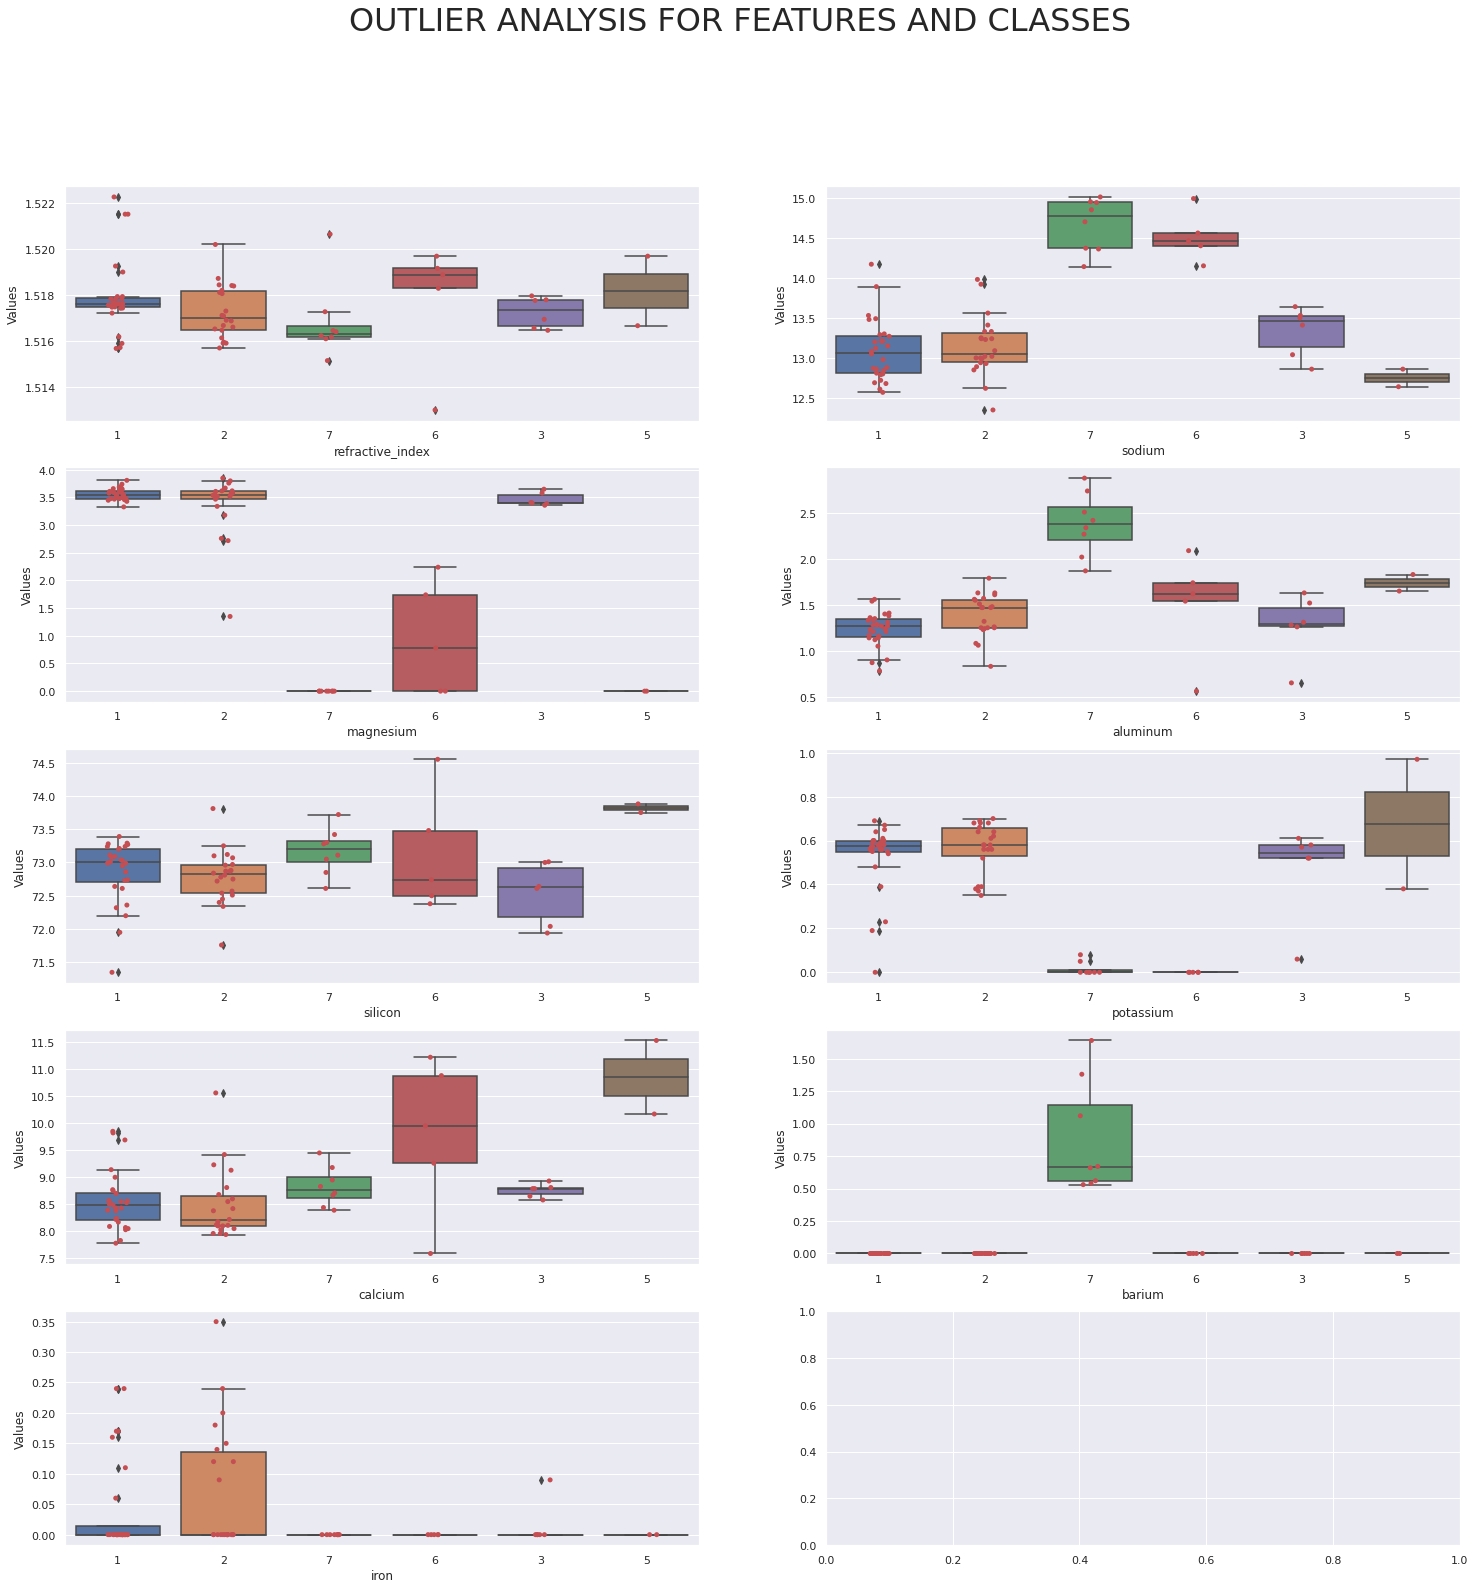

In [135]:
f, axes = plt.subplots(5, 2,figsize=(25, 25))

n=0
for i in range(0,5):
  for j in range(0,2):
    sns.boxplot(x=Y['type_of_glass'],y=X_clean[X_clean.columns[n]],ax=axes[i,j])
    #sns.swarmplot(x=Y['type_of_glass'],y=X[X.columns[n]],color='r', ax=axes[i,j])
    sns.stripplot(x=Y['type_of_glass'],y=X_clean[X_clean.columns[n]],color='r', ax=axes[i,j])
    axes[i,j].set(xlabel=X_clean.columns[n], ylabel='Values')
    n+=1
    if n==len(X_clean.columns):
      break
f.suptitle('OUTLIER ANALYSIS FOR FEATURES AND CLASSES', fontsize=32)
plt.show()

## Train Test Split

In [252]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X_clean, Y_clean, test_size=0.3)

## Normalize numeric features
### - StandardScaler of Sklearn to X_train

In [253]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [254]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns = X_train.columns)
X_train_scaled.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
101,0.411488,-0.076825,0.731248,-0.384093,-0.265467,0.344873,-0.755148,-0.311172,-0.502633
99,1.440474,-1.115800,-2.246945,0.553419,1.746917,-0.223836,3.767350,-0.311172,-0.502633
25,-2.922947,1.534340,-0.900957,0.295603,3.406616,-1.767474,-1.458058,-0.311172,-0.502633
111,-0.604473,0.043636,0.375412,-0.313779,-0.555914,0.344873,-0.052238,-0.311172,-0.502633
30,1.440474,1.775262,-2.246945,-2.001300,1.186769,-1.767474,3.356214,-0.311172,-0.502633


### - Normalize X_test

In [255]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index, columns = X_test.columns)
X_test_scaled.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
13,-0.376533,-0.076825,0.491445,0.459668,-0.763377,0.994826,-0.768411,-0.311172,-0.502633
79,-0.031367,-0.121997,0.537859,-0.641908,0.377666,0.588605,-0.688836,-0.311172,-0.502633
77,2.632274,-0.393034,0.522388,-1.204415,-1.468749,-0.833167,1.499470,-0.311172,1.410302
62,0.470101,-1.145915,-0.111929,-1.368479,1.871395,-0.345702,0.968971,-0.311172,1.888535
67,0.085860,-0.859820,0.491445,-0.430968,0.688860,0.588605,-0.397062,-0.311172,-0.502633


## Machine Learning
## Support Vectors Machine

In [335]:
param_grid = {'kernel':['linear','poly','rbf'],'C': [1,2,3], 'gamma': ['scale',1,5],'class_weight': ['balanced']}#,'probability':[True]}
model = SVC()
                                      
cv = GridSearchCV(model, param_grid,cv=3,scoring=['f1_micro','balanced_accuracy'],refit='f1_micro')
#cv = GridSearchCV()

In [336]:
cv.fit(X_train_scaled, y_train)
cv.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning:

y_pred contains classes not in y_true

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/u

{'mean_fit_time': array([0.00255243, 0.00252279, 0.00221332, 0.0022227 , 0.00211469,
        0.00222564, 0.00223136, 0.00207138, 0.00216818, 0.00229923,
        0.00215101, 0.00222651, 0.00228135, 0.00227849, 0.00265002,
        0.00218455, 0.00213575, 0.00213814, 0.0024426 , 0.00233142,
        0.00243163, 0.00226092, 0.00212264, 0.00216921, 0.00223176,
        0.00212336, 0.00242154]),
 'mean_score_time': array([0.00253455, 0.00221968, 0.00207798, 0.00204508, 0.00202664,
        0.00201114, 0.00202815, 0.00202727, 0.00202099, 0.00206828,
        0.0020055 , 0.00202338, 0.00217374, 0.0026749 , 0.00209816,
        0.00205866, 0.00198142, 0.00198666, 0.00206192, 0.00209387,
        0.00248694, 0.00220768, 0.00204301, 0.00204555, 0.00205231,
        0.00201837, 0.0022246 ]),
 'mean_test_balanced_accuracy': array([0.60216931, 0.44444444, 0.62978836, 0.60216931, 0.59746032,
        0.24153439, 0.60216931, 0.61079365, 0.1984127 , 0.63550265,
        0.48      , 0.60687831, 0.63550265, 0.610

In [337]:
cv.best_estimator_

SVC(C=3, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

balanced_accuracy and f1_micro.

In [338]:
print('Accuaracy train: ',cv.best_estimator_.score(X_train_scaled, y_train))
print('Accuaracy test: ',cv.best_estimator_.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,cv.best_estimator_.predict(X_test_scaled),average='micro'))
print('Recall: ',recall_score(y_test,cv.best_estimator_.predict(X_test_scaled),average=None))
print('Precision: ',precision_score(y_test,cv.best_estimator_.predict(X_test_scaled),average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test,cv.best_estimator_.predict(X_test_scaled)))

Accuaracy train:  0.8571428571428571
Accuaracy test:  0.6818181818181818
F1 score:  0.6818181818181818
Recall:  [0.66666667 0.71428571 0.         0.         1.         1.        ]
Precision:  [0.66666667 0.625      0.         0.         1.         1.        ]
Balanced Accuracy Score:  0.5634920634920635


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### - Bagging SVM

In [339]:
model_bagging = BaggingClassifier(cv.best_estimator_, n_estimators=100, max_samples=40, max_features=6)

In [340]:
model_bagging.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BaggingClassifier(base_estimator=SVC(C=3, break_ties=False, cache_size=200,
                                     class_weight='balanced', coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=6,
                  max_samples=40, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [341]:
print('Accuaracy train: ',model_bagging.score(X_train_scaled, y_train))
print('Accuaracy test: ',model_bagging.score(X_test_scaled, y_test))
print('F1 score: ',f1_score(y_test,model_bagging.predict(X_test_scaled),average='micro'))
print('Recall: ',recall_score(y_test,model_bagging.predict(X_test_scaled),average=None))
print('Precision: ',precision_score(y_test,model_bagging.predict(X_test_scaled),average=None))
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test,model_bagging.predict(X_test_scaled)))

Accuaracy train:  0.8163265306122449
Accuaracy test:  0.6818181818181818
F1 score:  0.6818181818181818
Recall:  [0.66666667 0.71428571 0.         0.         1.         1.        ]
Precision:  [0.66666667 0.625      0.         0.         1.         1.        ]
Balanced Accuracy Score:  0.5634920634920635


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

